In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [35]:
data = pd.read_csv('creditcard.csv')

In [39]:
data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [37]:
X = data.drop('Class', axis=1)
y = data['Class']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from imblearn.over_sampling import SMOTE



In [43]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [44]:
from sklearn.linear_model import LogisticRegression


In [45]:
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix


In [47]:
y_pred = model.predict(X_test)


In [48]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[55425  1439]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [49]:
from sklearn.model_selection import GridSearchCV


In [50]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

In [51]:
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='f1', verbose=2)


In [52]:
grid_search.fit(X_train_resampled, y_train_resampled)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   1.4s
[CV] END ................................C=0.001, penalty=l2; total time=   1.8s
[CV] END ................................C=0.001, penalty=l2; total time=   1.6s
[CV] END ................................C=0.001, penalty=l2; total time=   1.4s
[CV] END ................................C=0.001, penalty=l2; total time=   1.5s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01

C:\Users\SHIVANSH\anaconda3\envs\shiv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SHIVANSH\anaconda3\envs\shiv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SHIVANSH\anaconda3\envs\shiv\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\SHIVANSH\anaconda3\envs\shiv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver =

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=2)

In [54]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # Use 'l2' penalty with 'lbfgs' solver
}

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(solver='lbfgs', random_state=42), param_grid, cv=5, scoring='f1', verbose=2)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ................................C=0.001, penalty=l2; total time=   2.1s
[CV] END ................................C=0.001, penalty=l2; total time=   1.4s
[CV] END ................................C=0.001, penalty=l2; total time=   1.4s
[CV] END ................................C=0.001, penalty=l2; total time=   1.2s
[CV] END ................................C=0.001, penalty=l2; total time=   1.2s
[CV] END .................................C=0.01, penalty=l2; total time=   1.6s
[CV] END .................................C=0.01, penalty=l2; total time=   1.9s
[CV] END .................................C=0.01, penalty=l2; total time=   1.9s
[CV] END .................................C=0.01, penalty=l2; total time=   2.5s
[CV] END .................................C=0.01, penalty=l2; total time=   2.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   2.3s
[CV] END ..................................C=0.1,

In [55]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [56]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the first few rows of the DataFrame
print(results_df.head())

        Actual  Predicted
43428        1          1
49906        0          0
29474        0          0
276481       0          0
278846       0          0


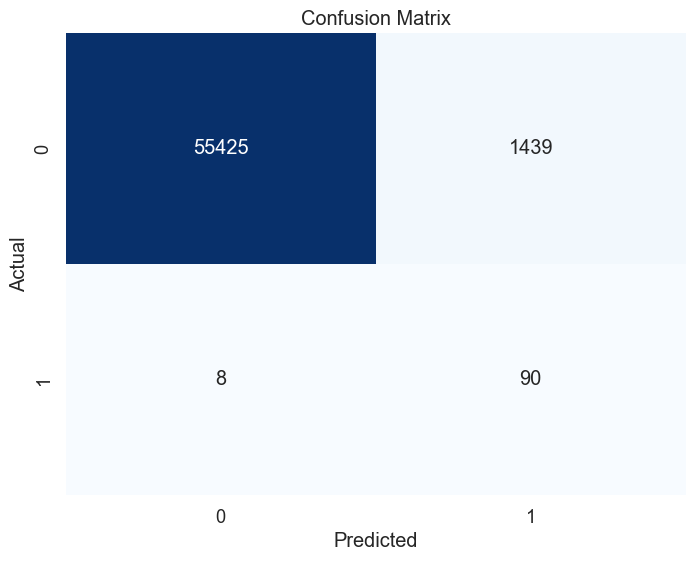

In [57]:
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()